In [6]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


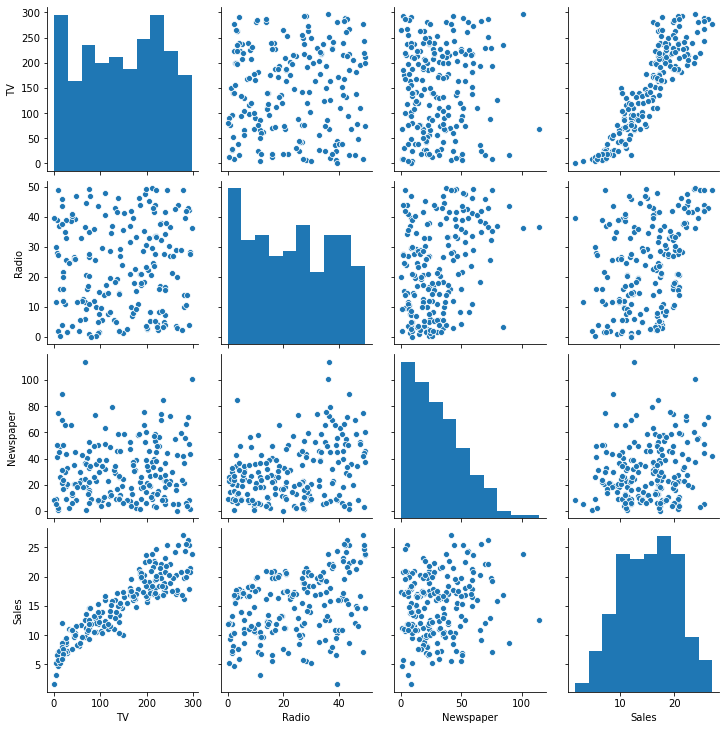

In [3]:
# Visulazing data
sns.pairplot(df)

In [4]:
x=df.drop('Sales',axis=1)
y=df["Sales"]

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

linear_reg=LinearRegression()
mse=cross_val_score(linear_reg,x,y,scoring="neg_mean_squared_error",cv=5)
mean_msev=np.mean(mse)
print(mean_msev)

-2.85824300999101


In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

ridge=Ridge()
parameters={"alpha":[1e-5,1e-2,1e-1,1,2,5,10,15,20,25]
    
}
ridge_reg=GridSearchCV(ridge,param_grid=parameters,scoring="neg_mean_squared_error",cv=5)
ridge_reg.fit(x,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-05, 0.01, 0.1, 1, 2, 5, 10, 15, 20, 25]},
             scoring='neg_mean_squared_error')

In [14]:
ridge_reg.best_params_

{'alpha': 25}

In [15]:
ridge_reg.best_score_

-2.858169340029673

In [16]:
from sklearn.linear_model import Lasso
parameters={"alpha":[1e-5,1e-2,1e-1,1,2,5,10,15,20,25]}
lasso=Lasso()
lasso_reg=GridSearchCV(lasso,param_grid=parameters,scoring="neg_mean_squared_error",cv=5)
lasso_reg.fit(x,y)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.01, 0.1, 1, 2, 5, 10, 15, 20, 25]},
             scoring='neg_mean_squared_error')

In [17]:
lasso_reg.best_params_

{'alpha': 1}

In [18]:
lasso_reg.best_score_

-2.851375129372136